In [1]:
pip install fastf1

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils

For this project, I will be using the fastf1 library, which is built on top of Pandas DataFrames and Series but includes convenient methods for working specifically with Formula 1 data. The goal of this project is to analyze the race session of the 2024 Australian Grand Prix, where Ferrari achieved a 1-2 finish with Carlos Sainz as the winner (proud moment for a Ferrari fan!).

The first step is to load the data for this session. After loading the data, we will proceed with data cleaning. This involves removing laps affected by pit stops and laps that are not accurate due to yellow flags, virtual safety cars, safety cars, or red flags.


In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)


# load a session and its telemetry data
session = fastf1.get_session(2024, 'Azerbaijan Grand Prix', 'Q')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()




req         WARNING 	DEFAULT CACHE ENABLED! (4.68 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.3.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '11', '63', '1', '44', '14', '43', '23', '50', '22', '27', '18', '3', '4', '77', '24', '31', '10']
core      

In [3]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:18:45.326000,LEC,16,0 days 00:01:43.595000,2.0,1.0,NaT,NaT,0 days 00:00:36.853000,0 days 00:00:41.715000,...,True,Ferrari,0 days 00:17:01.731000,2024-09-14 12:04:07.281,1,NaN,False,,False,True
2,0 days 00:20:59.893000,LEC,16,0 days 00:02:14.567000,3.0,1.0,NaT,NaT,0 days 00:00:51.584000,0 days 00:00:56.573000,...,True,Ferrari,0 days 00:18:45.326000,2024-09-14 12:05:50.876,1,NaN,False,,False,True
3,0 days 00:23:09.315000,LEC,16,0 days 00:02:09.422000,4.0,1.0,NaT,NaT,0 days 00:00:46.328000,0 days 00:00:56.321000,...,True,Ferrari,0 days 00:20:59.893000,2024-09-14 12:08:05.443,12,NaN,True,DOUBLE YELLOW AT TURN 1,False,True
4,0 days 00:24:52.090000,LEC,16,0 days 00:01:42.775000,5.0,1.0,NaT,NaT,0 days 00:00:36.162000,0 days 00:00:41.601000,...,True,Ferrari,0 days 00:23:09.315000,2024-09-14 12:10:14.865,12,NaN,False,,False,True
7,0 days 00:41:33.353000,LEC,16,0 days 00:01:43.422000,8.0,2.0,NaT,NaT,0 days 00:00:36.513000,0 days 00:00:41.906000,...,False,Ferrari,0 days 00:39:49.931000,2024-09-14 12:26:55.481,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0 days 00:16:59.531000,GAS,10,0 days 00:01:45.012000,2.0,1.0,NaT,NaT,0 days 00:00:37.328000,0 days 00:00:42.546000,...,True,Alpine,0 days 00:15:14.519000,2024-09-14 12:02:20.069,1,NaN,False,,False,True
300,0 days 00:23:43.489000,GAS,10,0 days 00:01:44.100000,5.0,2.0,NaT,NaT,0 days 00:00:36.776000,0 days 00:00:42.245000,...,True,Alpine,0 days 00:21:59.389000,2024-09-14 12:09:04.939,1,NaN,False,,False,True
303,0 days 00:31:35.546000,GAS,10,0 days 00:01:43.088000,8.0,3.0,NaT,NaT,0 days 00:00:36.375000,0 days 00:00:41.823000,...,True,Alpine,0 days 00:29:52.458000,2024-09-14 12:16:58.008,12,NaN,False,,False,True
306,0 days 00:44:10.899000,GAS,10,0 days 00:01:43.640000,11.0,4.0,NaT,NaT,0 days 00:00:36.770000,0 days 00:00:41.863000,...,False,Alpine,0 days 00:42:27.259000,2024-09-14 12:29:32.809,1,NaN,False,,False,True


In [4]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [5]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [6]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}


In [7]:
colors = {
    "SAI": "red", "LEC": "red", "NOR": "orange", "PIA": "orange", "PER": "blue",
    "ALO": "green", "RUS": "grey", "STR": "green", "TSU": "#9932CC", "BOT": "lime",
    "OCO": "pink", "HUL": "olive", "MAG": "olive", "RIC": "#9932CC", "ALB": "navy",
    "ZHO": "lime", "GAS": "pink", "HAM": "grey", "VER": "blue", 'SAR':"navy", 'DEV': "#9932CC", 
    'BEA': "olive", 'LAW':  "#9932CC", 'MSC': "olive", 'LAT': "navy", 'VET' : "green", 'COL':"navy"
}

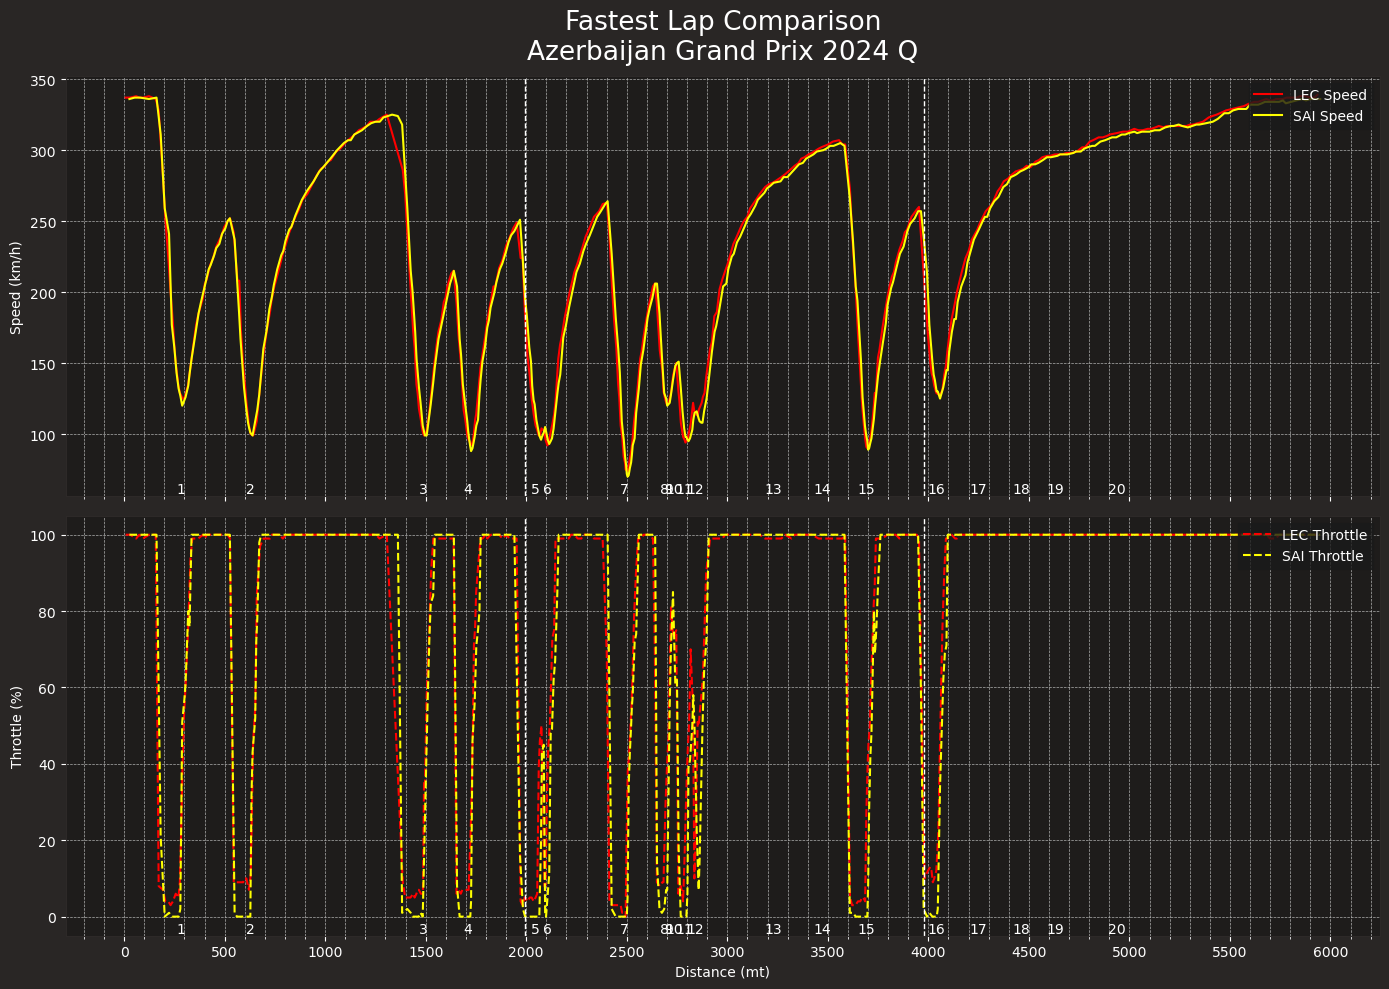

In [8]:
# Extract fastest laps for LEC and SAI
LEC_FASTEST_LAP = transformed_laps.pick_driver('LEC').pick_fastest()
SAI_FASTEST_LAP = transformed_laps.pick_driver('SAI').pick_fastest()
PIA_FASTEST_LAP = transformed_laps.pick_driver('PIA').pick_fastest()

# Get telemetry data and add distance
LEC_tel = LEC_FASTEST_LAP.get_car_data().add_distance()
SAI_tel = SAI_FASTEST_LAP.get_car_data().add_distance()
PIA_tel = SAI_FASTEST_LAP.get_car_data().add_distance()

# Length of the track
length_circuit = LEC_tel['Distance'].max()

# Get sector times for the fastest lap
LEC_sector_times = [
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector1Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector2Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(LEC_sector_times)

# Calculate sector end distances
sector1_end_distance = LEC_tel[LEC_tel['Time'] <= LEC_FASTEST_LAP['Sector1Time']]['Distance'].max()
sector2_end_distance = LEC_tel[LEC_tel['Time'] <= (LEC_FASTEST_LAP['Sector1Time'] + LEC_FASTEST_LAP['Sector2Time'])]['Distance'].max()

# Extract the 'Distance' column from the corners DataFrame
corner_distances = circuit_info.corners['Distance']

# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Generates sequential numbers from 1 to the number of corners


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(LEC_tel['Distance'], LEC_tel['Speed'], color='red', label='LEC Speed')
ax1.plot(SAI_tel['Distance'], SAI_tel['Speed'], color='yellow', label='SAI Speed')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} Q", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax1
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
# Plot Throttle on the second subplot
ax2.plot(LEC_tel['Distance'], LEC_tel['Throttle'], color='red', linestyle='--', label='LEC Throttle')
ax2.plot(SAI_tel['Distance'], SAI_tel['Throttle'], color='yellow', linestyle='--', label='SAI Throttle')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax2
for corner, number in zip(corner_distances, corner_numbers):
    ax2.text(corner, ax2.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')


# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Adjust layout
plt.tight_layout()
plt.show()


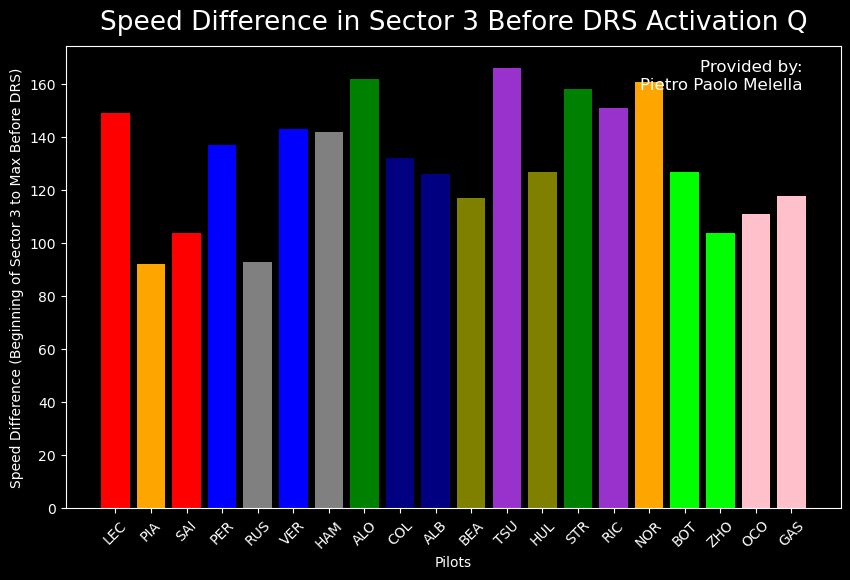

<Figure size 640x480 with 0 Axes>

In [9]:
speed_diff_t3_before_drs_activation= {}

for pilot in drivers:
    #pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    #getting car data and adding distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    #selecting the data starting for the sector 3
    pilot_car_data_t3 = pilot_car_data[pilot_car_data['Distance']>sector2_end_distance]
    #selecting the data from the begging of sector to the last max speed with drs closed
    pilot_car_data_t3_drs_closed = pilot_car_data_t3[(pilot_car_data_t3['DRS'] > 0) & (pilot_car_data_t3['DRS'] < 9)].reset_index()
    #computing the different 
    speed_diff_t3_before_drs_activation[pilot] = pilot_car_data_t3_drs_closed['Speed'].max() - pilot_car_data_t3_drs_closed['Speed'][0]



# Extract the pilots and speeds
pilots = list(speed_diff_t3_before_drs_activation.keys())
speeds = list(speed_diff_t3_before_drs_activation.values())
pilot_colors = [colors.get(pilot, 'black') for pilot in pilots]  # Default to black if color not found

# Create bar plot
plt.figure(figsize=(10,6))
plt.bar(pilots, speeds, color=pilot_colors)

# Add labels and title
plt.xlabel('Pilots')
plt.ylabel('Speed Difference (Beginning of Sector 3 to Max Before DRS)')
plt.title('Speed Difference in Sector 3 Before DRS Activation Q')

# Rotate pilot labels for better readability
plt.xticks(rotation=45)

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Show the plot
plt.show()

# Show plot
plt.tight_layout()
plt.show()

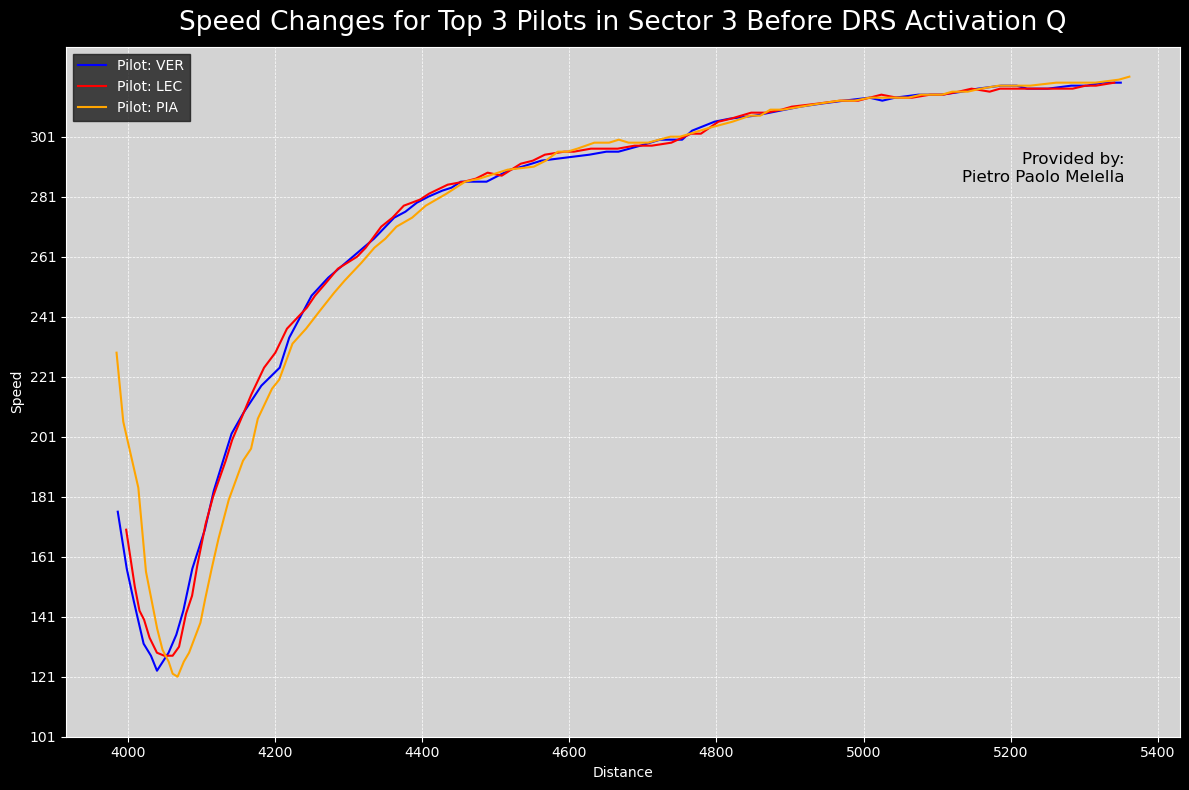

In [10]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))

# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

drivers_4 =['VER', 'LEC','PIA']

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    # Selecting the data starting from sector 3
    pilot_car_data_t3 = pilot_car_data[pilot_car_data['Distance'] > sector2_end_distance]
    # Selecting the data from the beginning of sector 3 until the max speed with DRS closed
    pilot_car_data_t3_drs_closed = pilot_car_data_t3[(pilot_car_data_t3['DRS'] > 0) & (pilot_car_data_t3['DRS'] < 9)].reset_index()
    
    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_t3_drs_closed['Distance'], pilot_car_data_t3_drs_closed['Speed'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")
    
# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Speed Changes for Top 3 Pilots in Sector 3 Before DRS Activation Q')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Set y-axis ticks at intervals of 20
plt.yticks(range(int(min(pilot_car_data_t3_drs_closed['Speed'].max(), 100)) + 1, int(max(pilot_car_data_t3_drs_closed['Speed'].max(), 100)), 20))

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

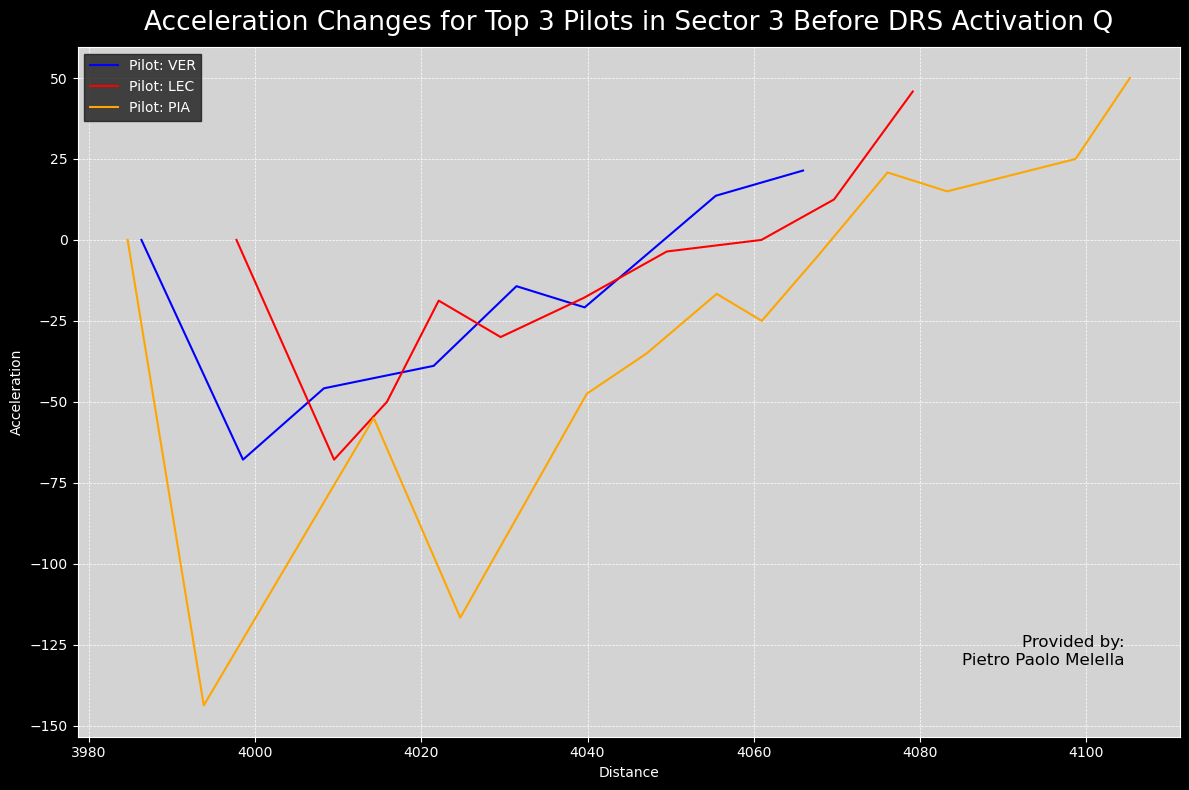

In [11]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')
# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    # Selecting the data starting from sector 3
    pilot_car_data_t3 = pilot_car_data[pilot_car_data['Distance'] > sector2_end_distance]
    # Selecting the data from the beginning of sector 3 until the max speed with DRS closed
    pilot_car_data_t3_drs_closed = pilot_car_data_t3[(pilot_car_data_t3['DRS'] > 0) & (pilot_car_data_t3['DRS'] < 9)].reset_index()

    pilot_car_data_t3_drs_closed['Acceleration'] = ((pilot_car_data_t3_drs_closed['Speed'].diff().fillna(0))  / pilot_car_data_t3_drs_closed['SessionTime'].dt.total_seconds().diff().fillna(0).fillna(0)).fillna(0)
    
    pilot_car_data_t3_drs_closed_filtered = pilot_car_data_t3_drs_closed[pilot_car_data_t3_drs_closed['Throttle']<99].reset_index()

    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_t3_drs_closed_filtered['Distance'], pilot_car_data_t3_drs_closed_filtered['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")


# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 3 Pilots in Sector 3 Before DRS Activation Q')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


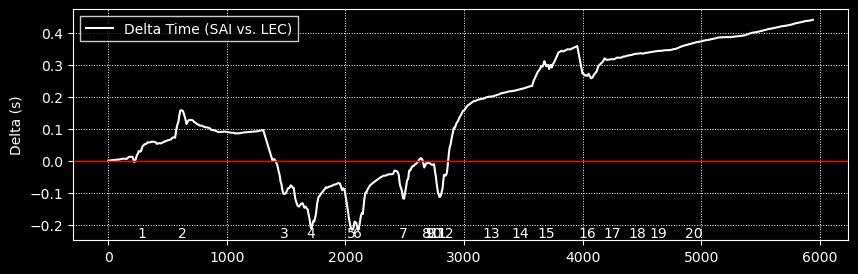

In [12]:
# Assuming `delta_time`, `ref_tel`, and `compare_tel` are already calculated
# If you haven't calculated delta_time, ref_tel, and compare_tel:
delta_time, ref_tel, compare_tel = utils.delta_time(LEC_FASTEST_LAP, SAI_FASTEST_LAP)

# Extract 'Distance' from the corners DataFrame
corner_distances = circuit_info.corners['Distance']

# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Sequential corner numbers

# Create the plot
plt.figure(figsize=(10, 3))  # Wide figure for the delta plot
ax1 = plt.gca()

# Plot the delta time between the two laps
ax1.plot(ref_tel['Distance'], delta_time, color='white', label='Delta Time (SAI vs. LEC)')  # White line for delta

# Add a red horizontal line at y=0
ax1.axhline(0, color='red', linewidth=1)

# Customize the plot background and grid
ax1.set_facecolor('black')  # Black background
ax1.grid(True, color='white', linestyle=':', linewidth=0.7)  # Dotted white grid

# Annotate the plot with corner numbers
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, 
             verticalalignment='bottom', horizontalalignment='center')

# Customize the y-axis label and ticks
ax1.set_ylabel('Delta (s)', color='white')

# Set the color of the axis ticks and labels to white
ax1.tick_params(axis='both', colors='white')

# Customize the spines (axes lines)
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_color('white')

# Add a legend to explain the plot elements
ax1.legend(loc='upper left', facecolor='black', edgecolor='white', fontsize=10, labelcolor='white')

# Show the plot
plt.show()

In [13]:
#to fix

#import torch

def delta_time_pytorch(reference_lap, compare_lap):
    """
    Calculate the delta time between two laps using PyTorch for interpolation and computation.
    
    Args:
        reference_lap (pd.Series): The lap taken as reference
        compare_lap (pd.Series): The lap to compare
    
    Returns:
        tuple: (delta, reference, comparison)
          - torch.Tensor with the delta in seconds.
          - Dictionary for the reference lap telemetry
          - Dictionary for the comparison lap telemetry
    """

    # Extract telemetry and convert to PyTorch tensors
    ref = reference_lap.get_car_data(interpolate_edges=True).add_distance()
    comp = compare_lap.get_car_data(interpolate_edges=True).add_distance()

    ref_distance = torch.tensor(ref['Distance'].to_numpy(), dtype=torch.float32)
    ref_time = torch.tensor(ref['Time'].dt.total_seconds().to_numpy(), dtype=torch.float32)

    comp_distance = torch.tensor(comp['Distance'].to_numpy(), dtype=torch.float32)
    comp_time = torch.tensor(comp['Time'].dt.total_seconds().to_numpy(), dtype=torch.float32)

    # Interpolation function using PyTorch
    def linear_interpolate(x, xp, fp):
        # Clamping values to avoid extrapolation
        x = torch.clamp(x, xp.min(), xp.max())
        
        indices = torch.searchsorted(xp, x, right=True) - 1
        indices = torch.clamp(indices, 0, len(xp) - 2)

        x0 = xp[indices]
        x1 = xp[indices + 1]
        y0 = fp[indices]
        y1 = fp[indices + 1]
        
        # Linear interpolation formula
        slope = (y1 - y0) / (x1 - x0)
        return y0 + slope * (x - x0)

    # Perform linear interpolation for lap time along the reference lap distance
    lap_time_interpolated = linear_interpolate(ref_distance, comp_distance, comp_time)

    # Calculate the delta between interpolated comparison lap and reference lap
    delta = lap_time_interpolated - ref_time

    return delta, ref, comp
